In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Figuras destinadas al capítulo del modelado de conductor

In [19]:
%matplotlib inline

import glob

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (12, 7)
plt.style.use('bmh')


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [20]:
SUBJECTS = 'all',  # 'miguel', 'edgar', 'jj'
STAGES = 'training', 'validation', 'test'

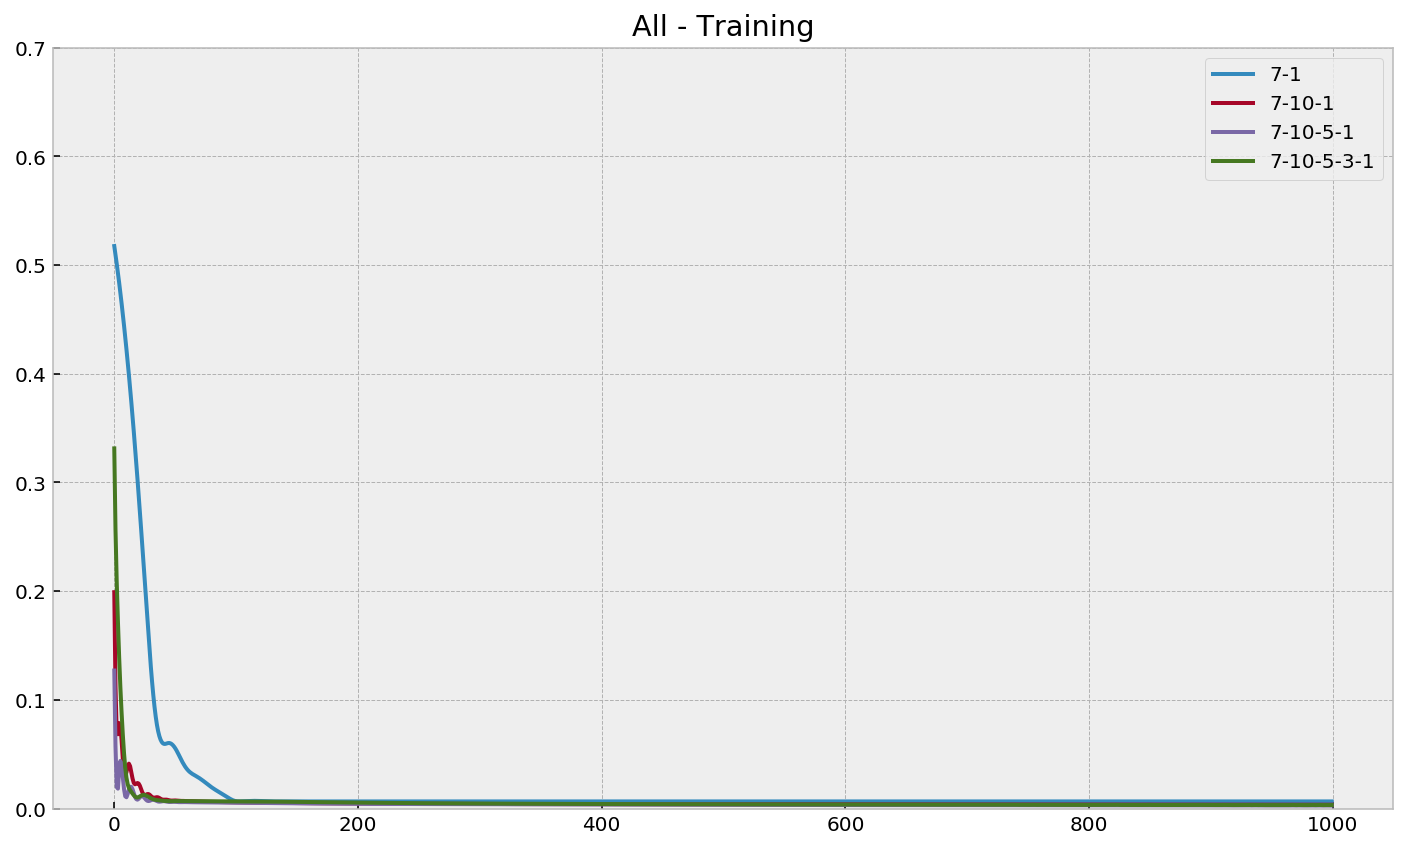

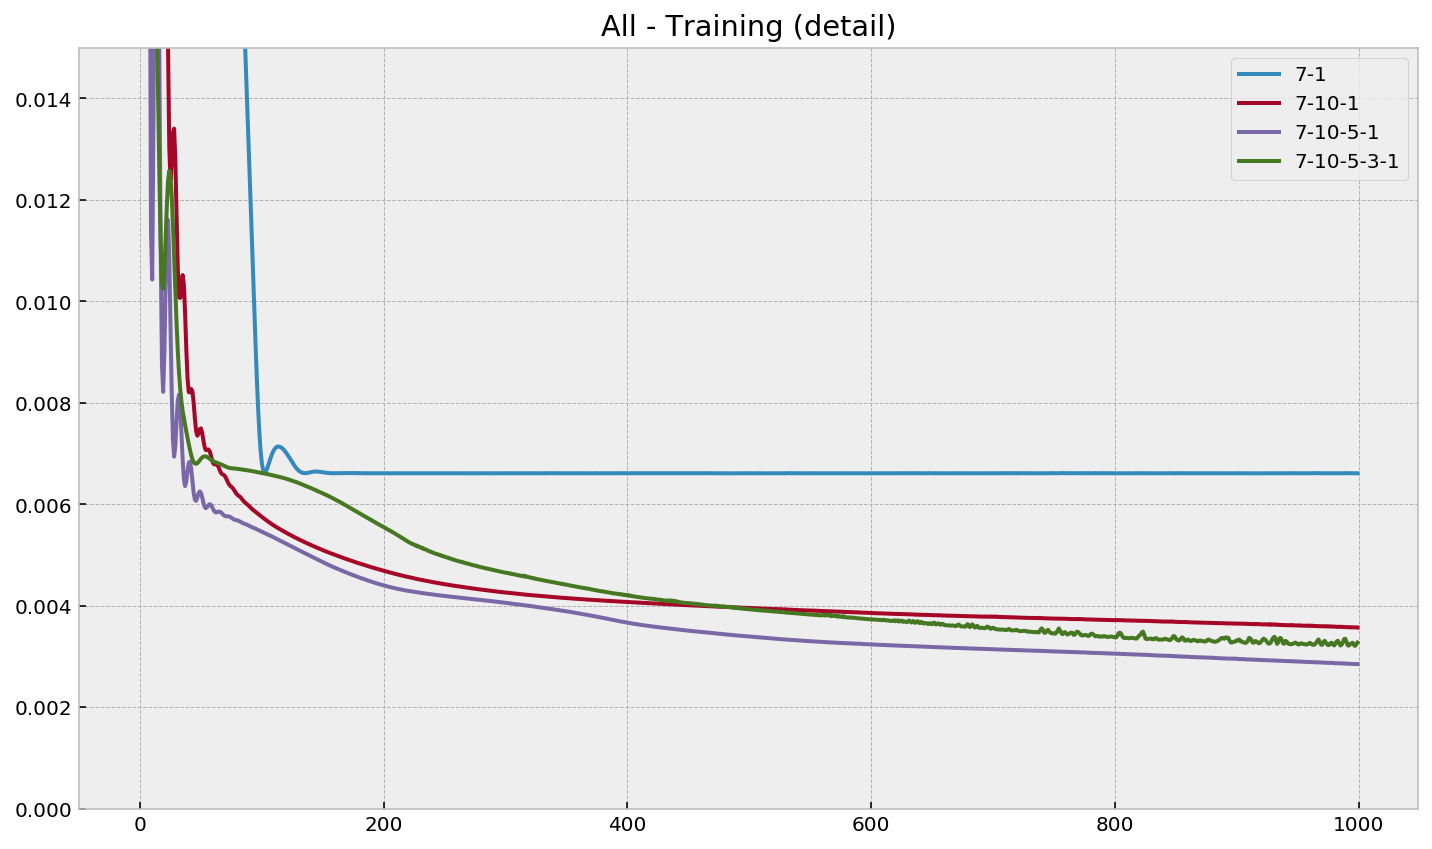

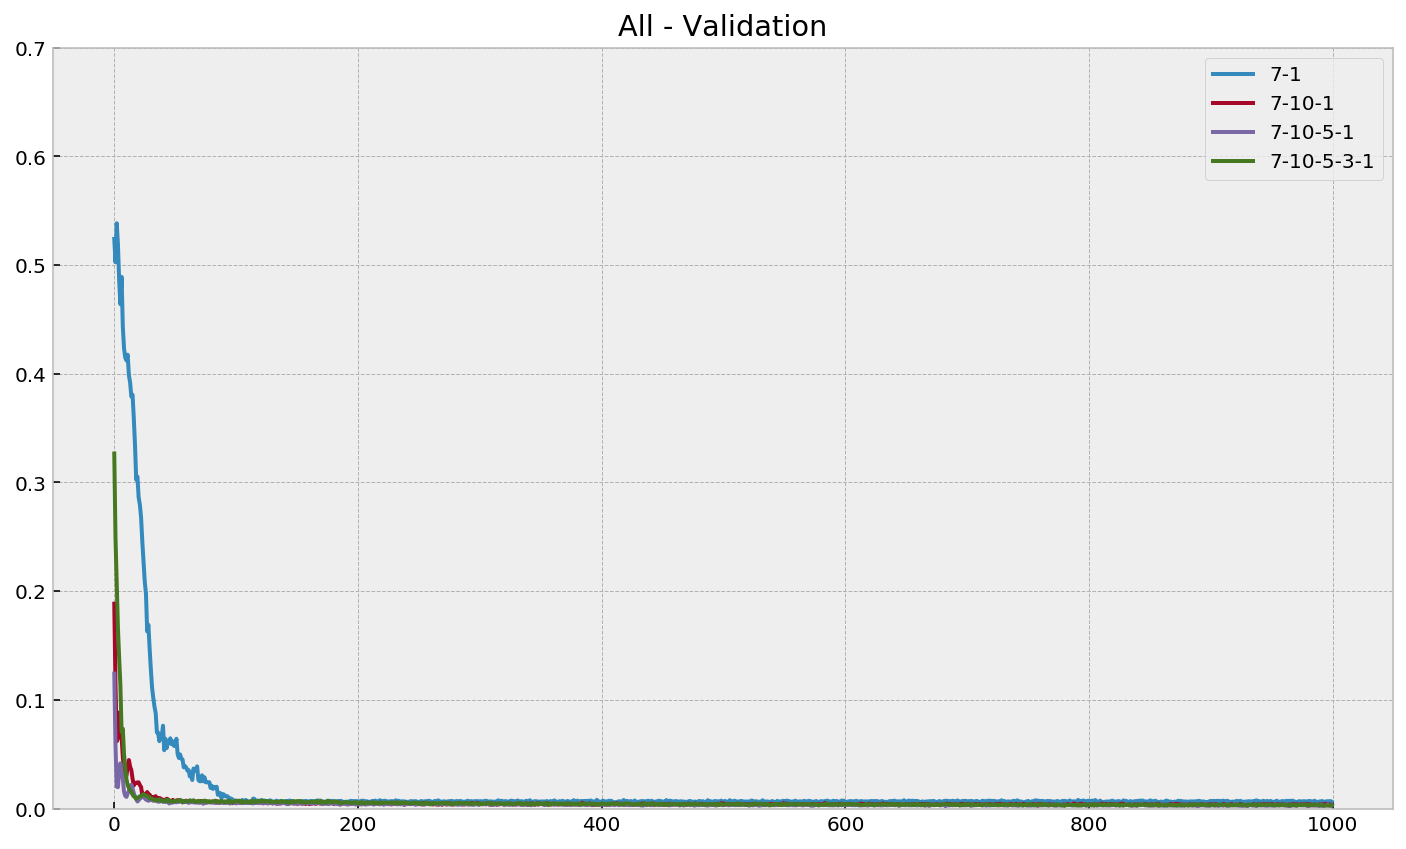

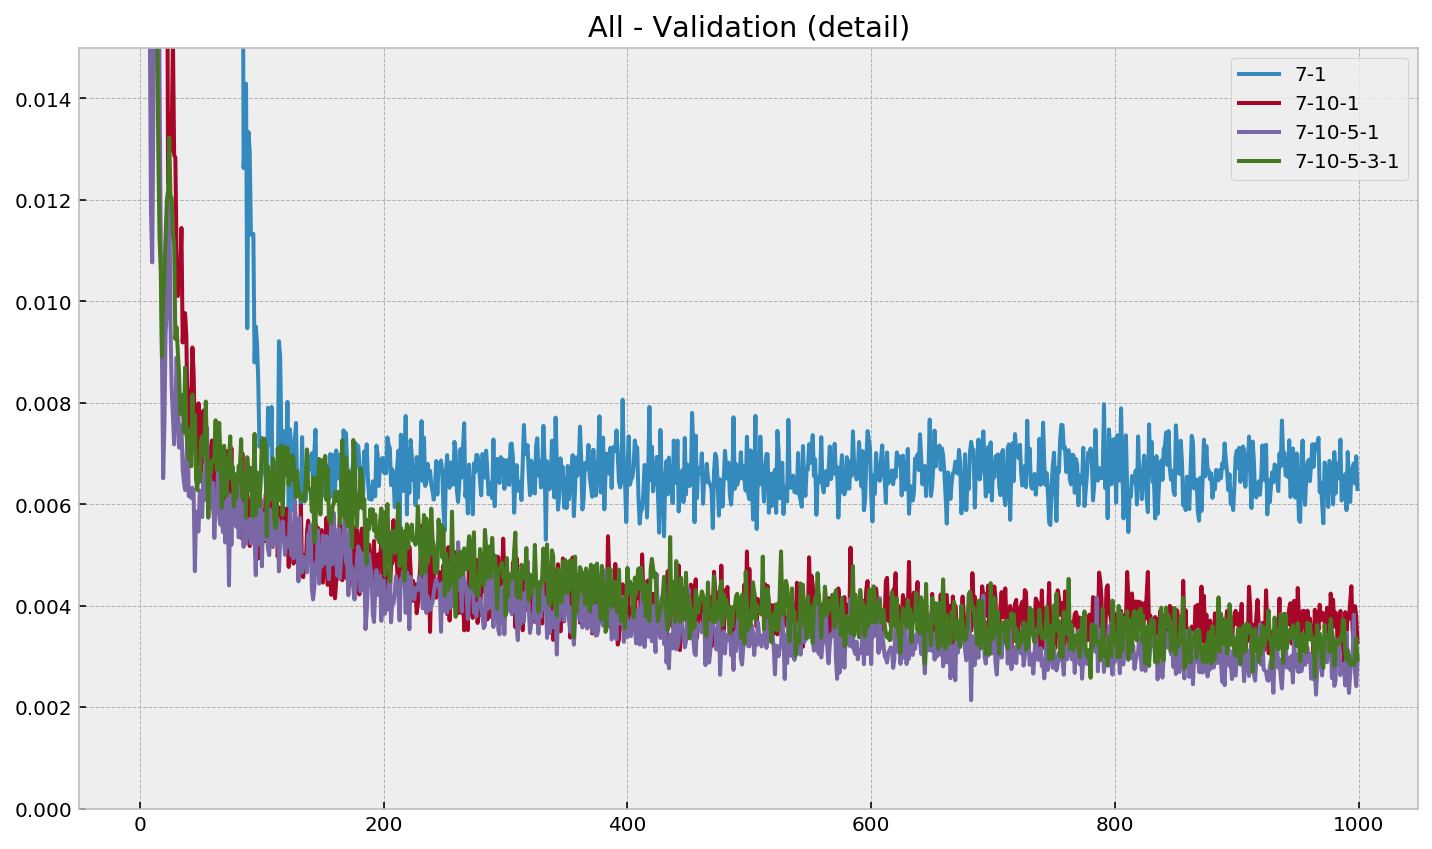

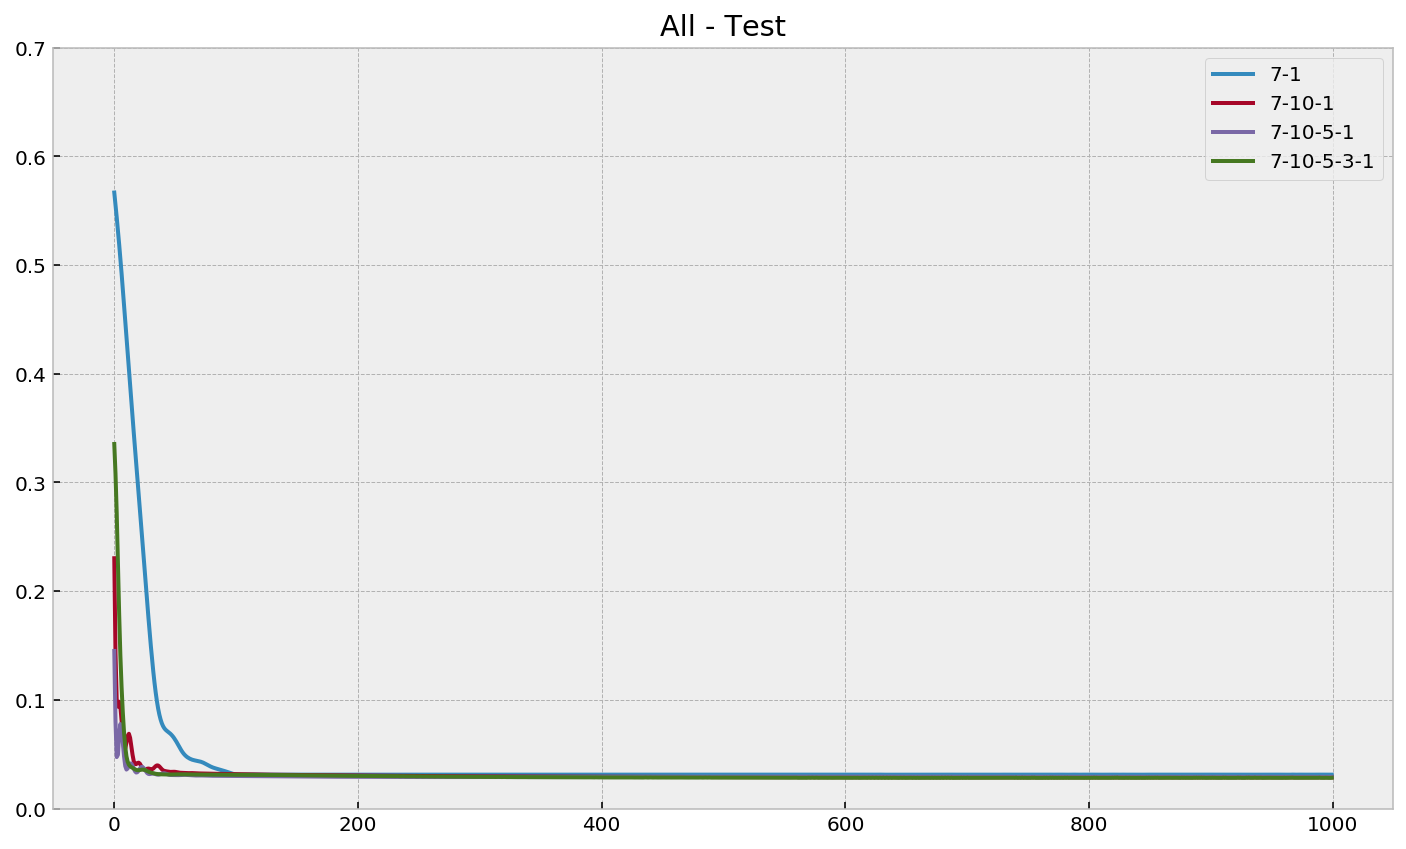

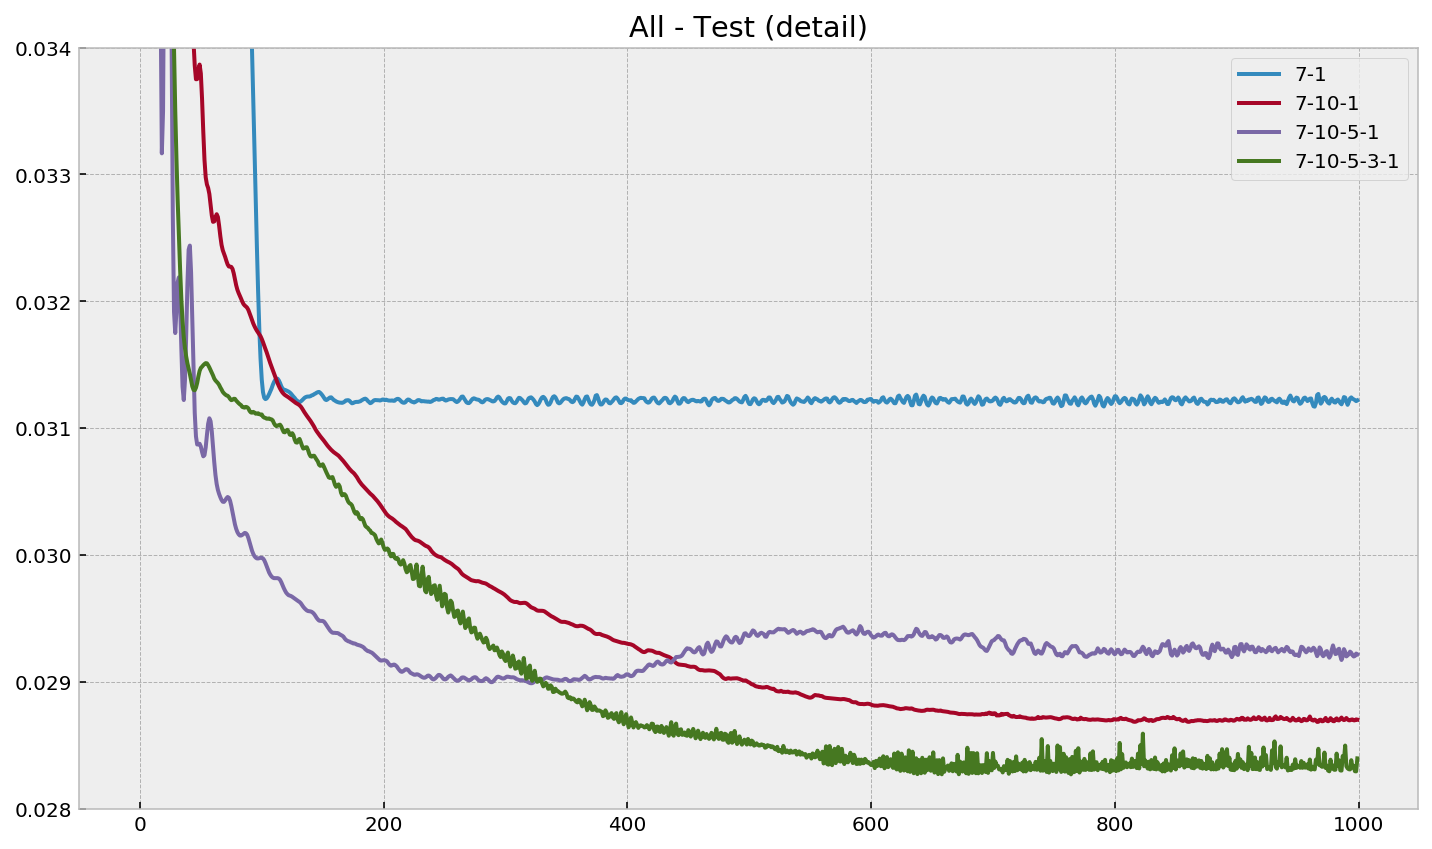

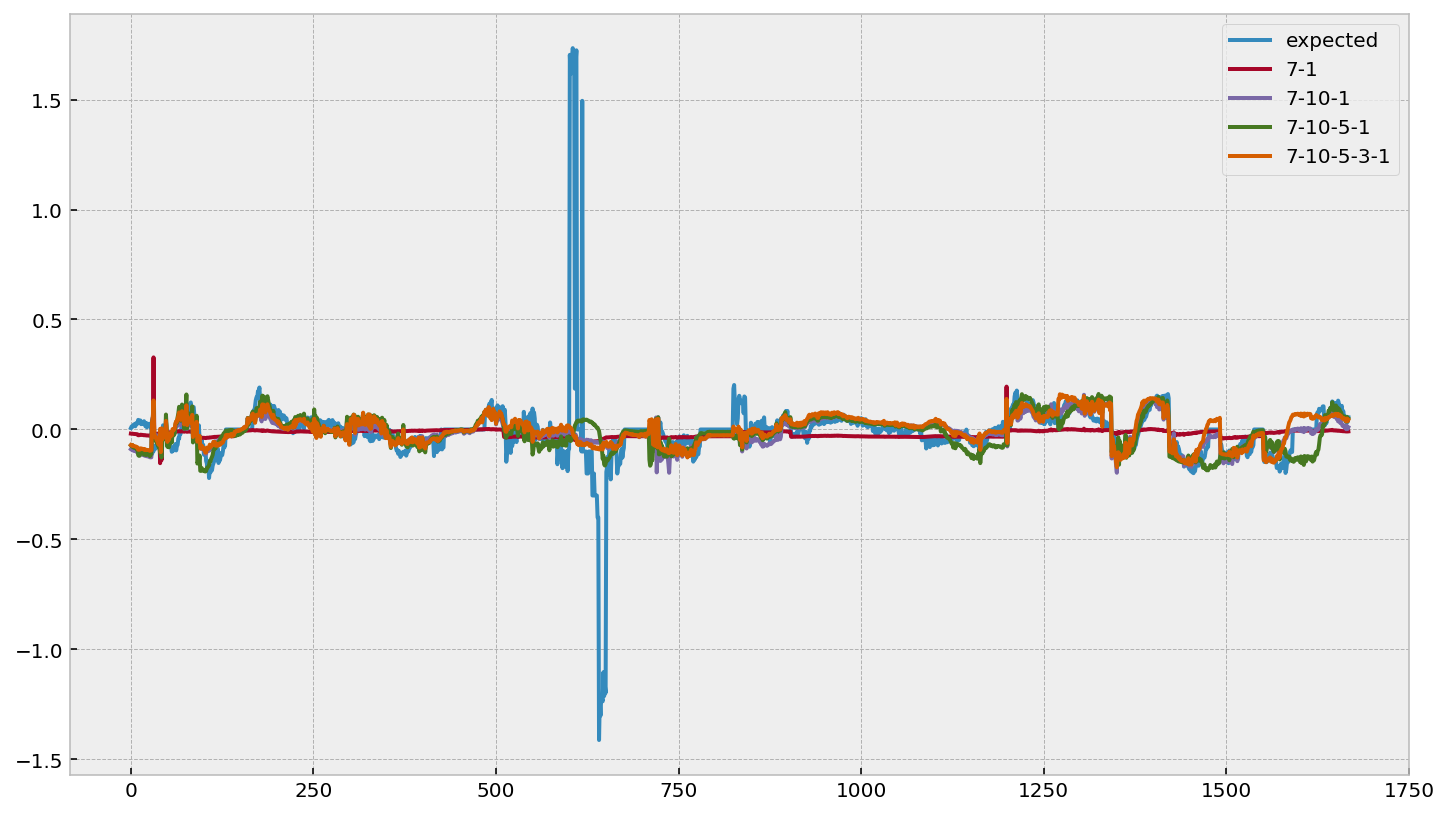

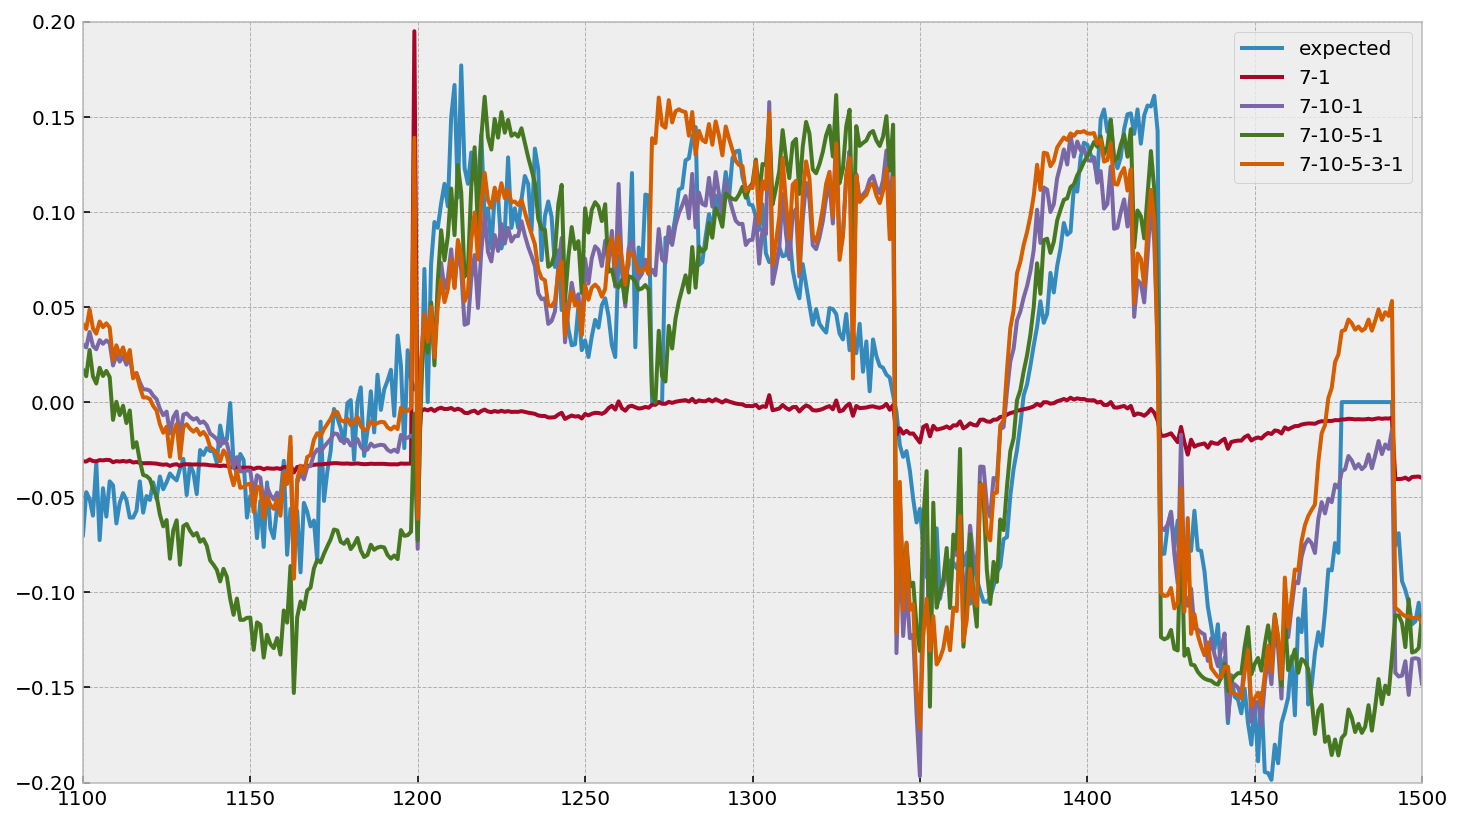

In [21]:
for subject in SUBJECTS:
    rms_files = sorted([f for f in glob.glob('mlp-rms-{}-*.csv'.format(subject))], key=lambda x: (len(x), x))
    out_files = sorted([f for f in glob.glob('mlp-outputs-{}-*.csv'.format(subject))], key=lambda x: (len(x), x))
    architectures = [s.replace('.csv', '').replace('mlp-rms-{}-'.format(subject), '') for s in rms_files]
    rms_dfs = [pd.read_csv(f, index_col=None) for f in rms_files]
    out_dfs = [pd.read_csv(f, index_col=None) for f in out_files]

    # General
    for stage in STAGES:
        # General RMS comparison
        fig, ax = plt.subplots(1, 1)
        ax.set_title(subject.capitalize() + ' - ' + stage.capitalize())
        ax.set_ylim(0, 0.7)
        stage_df = pd.DataFrame()
        for architecture, df in zip(architectures, rms_dfs):
            stage_df[architecture] = df[stage]
        stage_df.plot(ax=ax)
        # Detail RMS comparison
        fig, ax = plt.subplots(1, 1)
        ax.set_title(subject.capitalize() + ' - ' + stage.capitalize() + ' (detail)')
        if stage == 'test':
            ax.set_ylim(0.028, 0.034)
        else:
            ax.set_ylim(0, 0.015)
        stage_df = pd.DataFrame()
        for architecture, df in zip(architectures, rms_dfs):
            stage_df[architecture] = df[stage]
        stage_df.plot(ax=ax)

    outs_df = pd.DataFrame()
    outs_df['expected'] = out_dfs[0]['expected']
    for architecture, df in zip(architectures, out_dfs):
        outs_df[architecture] = df['real']
    # General
    fig, ax = plt.subplots(1, 1)
    outs_df.plot(ax=ax)
    # Detail
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim(1100, 1500)
    ax.set_ylim(-0.2, 0.2)
    outs_df.plot(ax=ax)
    #fig.savefig('../../report/figures/deep-learning-capabilities.pdf',bbox_inches='tight')